In [42]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import time

np.random.seed(42)

# Generating the data

In [11]:
x1 = np.random.normal(size=(1000, 1), loc=5, scale=3)
x2 = np.random.normal(size=(1000, 1), loc=10, scale=100)
x3 = np.random.normal(size=(1000, 1), loc=1, scale=7)
x4 = np.random.normal(size=(1000, 1), loc=3, scale=900)
x5 = np.random.normal(size=(1000, 1), loc=100, scale=6)
x6 = np.random.normal(size=(1000, 1), loc=3, scale=59)
x7 = np.random.normal(size=(1000, 1), loc=1000, scale=4)
x8 = np.random.normal(size=(1000, 1), loc=22, scale=55)

X = np.concatenate([x1, x2, x3, x4, x5, x6, x7, x8], axis=1)

In [12]:
m = np.random.normal(size=8)

In [13]:
y = (X*m).sum(axis=1) + np.random.normal(size=1000, scale=200)

# Building the model

In [14]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X, y)

LinearRegression()

In [21]:
y_pred = model.predict(X)

/home/nevin/anaconda3/envs/cv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nevin/anaconda3/envs/cv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

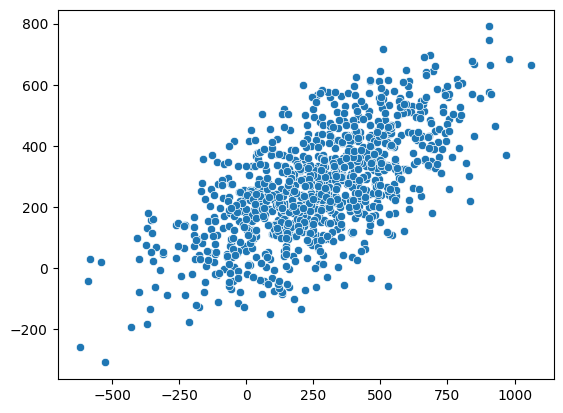

In [22]:
sns.scatterplot(x=y, y=y_pred)

# Saving the data and model

##### Saving the data

In [51]:
model_dict = {}
model_dict['coef'] = model.coef_
model_dict['intercept'] = model.intercept_
model_dict

{'coef': array([ 0.75568351,  1.12939616,  0.52521255, -0.13658123,  0.5836674 ,
        -0.4185402 ,  0.06868902,  1.03548009]),
 'intercept': 108.12875268590685}

##### Saving the data

In [37]:
df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1))
df.columns = [f'x_{i}' for i in range(8)] + ['y']

In [40]:
df.to_csv('train_data.csv', index=None)

# Benchmarking

In [49]:
n = 10000000

In [55]:
start_time = time.time()
for i in range(n):
    model.predict(X)
time_taken = time.time() - start_time

print(f'Time taken: {time_taken}')
print(f'Inferences per second: {(n*X.shape[0])/(time_taken*1e6)}')

Time taken: 240.6091365814209
Inferences per second: 41.561181516546654


In [43]:
X.shape

(1000, 8)

# Test codes

In [52]:
y_pred

array([ 2.25131644e+02,  3.74757318e+02,  5.55605482e+02,  2.60895342e+02,
        1.52438329e+02,  1.13139422e+02,  4.43377774e+02,  3.44053371e+02,
       -2.43908349e+01,  3.54605532e+02,  1.56260140e+02,  5.13718409e+02,
        5.30666171e+02,  4.39960904e+02,  4.27473787e+02,  1.10964053e+02,
        2.39442959e+02,  2.93767338e+02,  4.68456385e+02, -6.93752861e+01,
        3.28866681e+02,  1.93328613e+02,  3.19612414e+02,  4.42591144e+02,
        2.74730290e+02,  3.40118879e+02, -1.27351497e+02,  3.90661011e+02,
        2.72703808e+02,  5.38201476e+02,  7.21152255e+01,  6.11088922e+02,
        2.73138681e+02,  3.27627280e+02,  1.77983191e+02,  1.86742400e+02,
       -3.29600212e+01,  3.16766104e+02,  2.10604068e+02,  1.80579179e+02,
        2.55210481e+02,  3.23643556e+02,  1.29234227e+01,  2.16378942e+02,
       -3.23713221e+00,  2.31878452e+02,  1.87252653e+02,  2.33070998e+02,
        3.74281922e+02, -6.11583706e+01,  2.57307559e+02,  5.26628597e+01,
        3.12528795e+02,  

In [53]:
40941374.39341414/1e6

40.94137439341414